In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
print(data_dir)

/root/.keras/datasets/flower_photos


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


[PosixPath('/root/.keras/datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/2471103806_87ba53d997_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/14970973709_968910640e_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/9159362388_c6f4cf3812_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/6363976189_e7155e5f9c.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/1756973583_4aac7df00d_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/6950609394_c53b8c6ac0_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/8035908422_87220425d2_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/7455236056_b6d71a8dab.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/9300754115_dd79670066_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/3713368809_eba7fa2fbf_m.

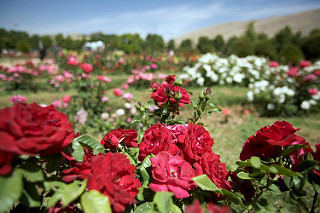

In [ ]:
roses = list(data_dir.glob('roses/*'))
print(roses)
PIL.Image.open(str(roses[1]))

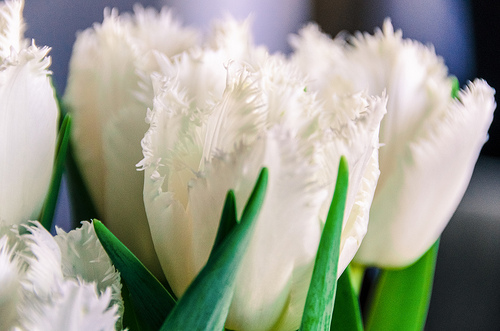

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="both",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.


In [ ]:
print(train_ds.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


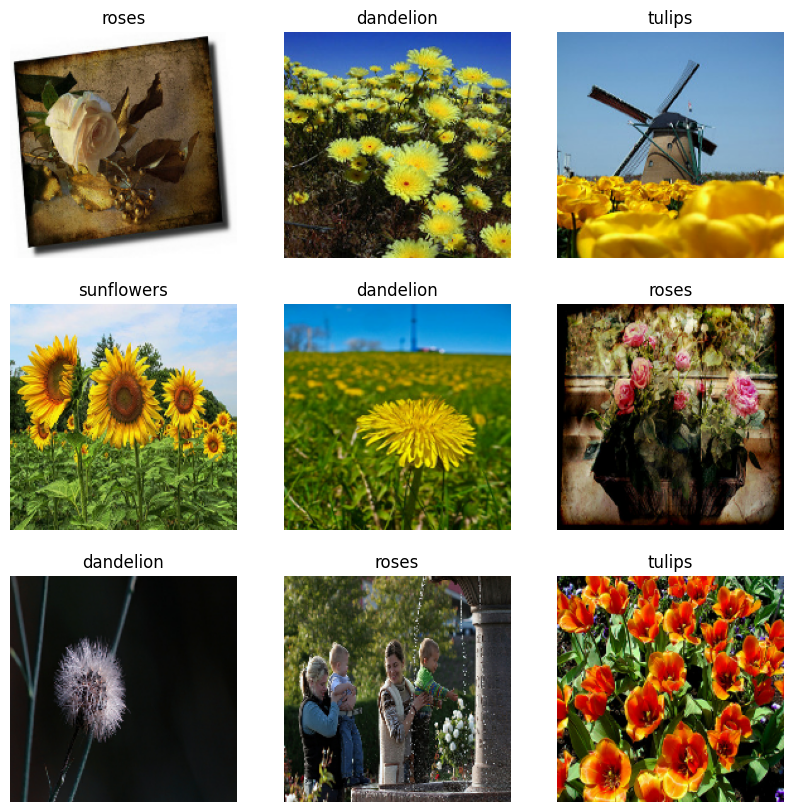

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.96902645


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 14s 83ms/step - loss: 1.3105 - accuracy: 0.4489 - val_loss: 1.0788 - val_accuracy: 0.5545
Epoch 2/10
92/92 [==============================] - 5s 54ms/step - loss: 0.9557 - accuracy: 0.6226 - val_loss: 0.9317 - val_accuracy: 0.6240
Epoch 3/10
92/92 [==============================] - 7s 70ms/step - loss: 0.7983 - accuracy: 0.6870 - val_loss: 0.8802 - val_accuracy: 0.6526
Epoch 4/10
92/92 [==============================] - 5s 55ms/step - loss: 0.5702 - accuracy: 0.7858 - val_loss: 1.0871 - val_accuracy: 0.5817
Epoch 5/10
92/92 [==============================] - 7s 70ms/step - loss: 0.3675 - accuracy: 0.8696 - val_loss: 1.0488 - val_accuracy: 0.6485
Epoch 6/10
92/92 [==============================] - 5s 54ms/step - loss: 0.1740 - accuracy: 0.9404 - val_loss: 1.2797 - val_accuracy: 0.6512
Epoch 7/10
92/92 [==============================] - 6s 59ms/step - loss: 0.0827 - accuracy: 0.9762 - val_loss: 1.5379 - val_accuracy: 0.6662
Epoch 8/10
9

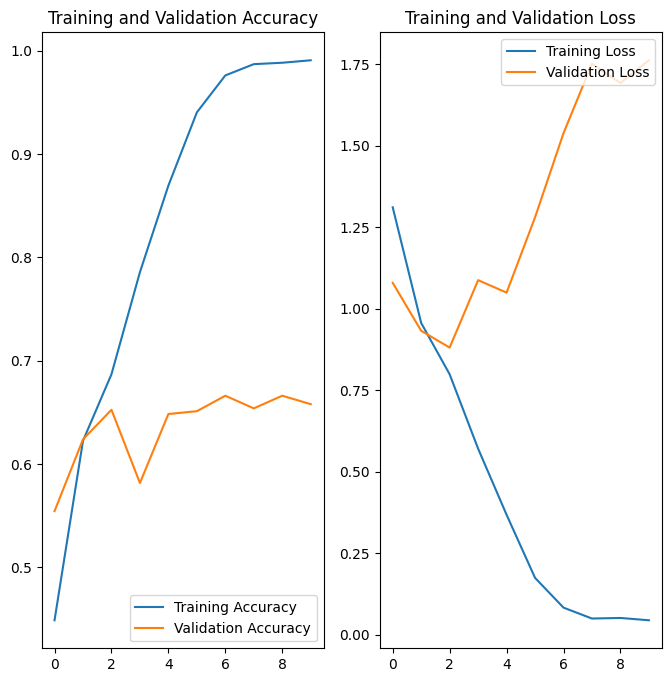

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Overfitting

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

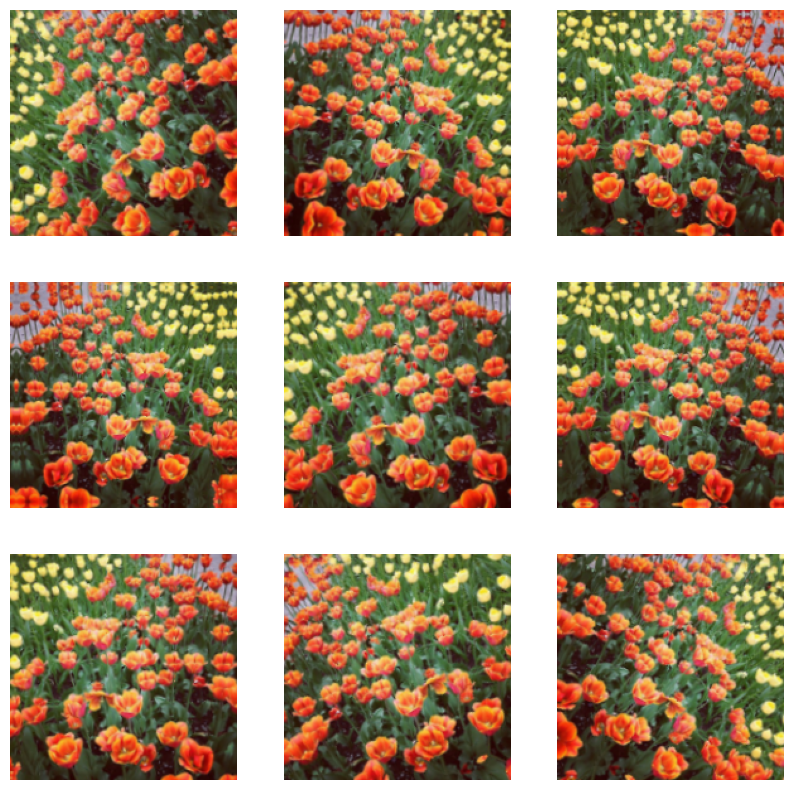

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
92/92 [==============================] - 10s 62ms/step - loss: 1.2908 - accuracy: 0.4513 - val_loss: 1.1168 - val_accuracy: 0.5341
Epoch 2/15
92/92 [==============================] - 7s 76ms/step - loss: 1.0554 - accuracy: 0.5736 - val_loss: 1.0202 - val_accuracy: 0.5668
Epoch 3/15
92/92 [==============================] - 6s 58ms/step - loss: 0.9617 - accuracy: 0.6100 - val_loss: 0.9191 - val_accuracy: 0.6349
Epoch 4/15
92/92 [==============================] - 8s 81ms/step - loss: 0.8893 - accuracy: 0.6567 - val_loss: 0.8848 - val_accuracy: 0.6540
Epoch 5/15
92/92 [==============================] - 6s 57ms/step - loss: 0.8412 - accuracy: 0.6740 - val_loss: 1.0306 - val_accuracy: 0.6104
Epoch 6/15
92/92 [==============================] - 7s 76ms/step - loss: 0.7679 - accuracy: 0.7050 - val_loss: 0.8571 - val_accuracy: 0.6662
Epoch 7/15
92/92 [==============================] - 6s 57ms/step - loss: 0.7579 - accuracy: 0.7027 - val_loss: 0.7907 - val_accuracy: 0.6798
Epoch 8/15
9

In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


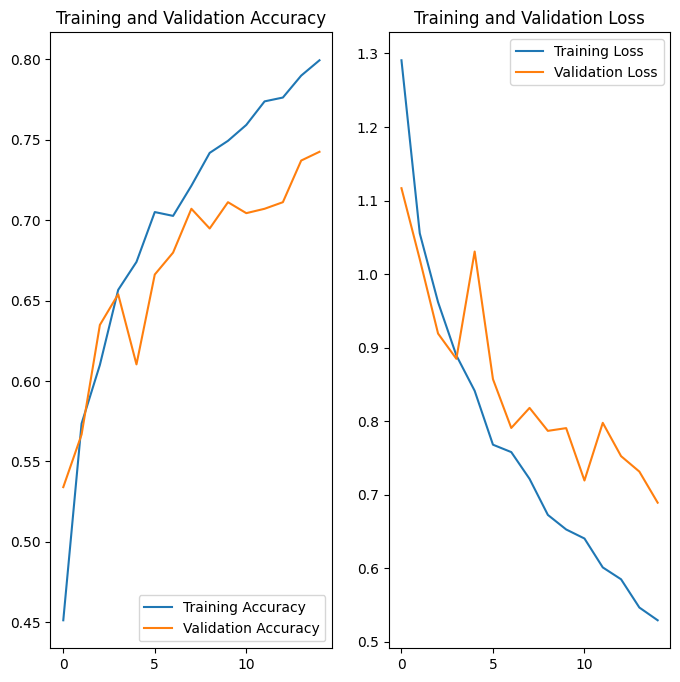

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predict on new data

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
print(sunflower_path)

#pre process
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_label = sunflower_url.split("/")[-1].split("_")[1].split(".")[0]

#predict
predictions = model.predict(img_array)
# print(predictions[0])
score = tf.nn.softmax(predictions[0])
# print(score)
# print(np.argmax(score))
# print(class_names)
print(
    "This image most likely belongs to [{}] with a {:.2f} percent confidence, expected label:{}"
    .format(class_names[np.argmax(score)], 100 * np.max(score), img_label)
)

/root/.keras/datasets/Red_sunflower
1/1 [==============================] - 0s 18ms/step
This image most likely belongs to [sunflowers] with a 83.79 percent confidence, expected label:sunflower


### Multiple flowers

In [ ]:
flower_urls = [
    "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg",
]

for url in flower_urls:

    # Get filename and expected label from URL
    filename = url.split("/")[-1]

    # Download, load, and pre-process image
    sunflower_path = tf.keras.utils.get_file(filename, origin=url)
    img = tf.keras.utils.load_img(sunflower_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    img_label = filename.split("_")[1].split(".")[0]

    # Predict and obtain score
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # Print prediction and confidence
    print(
        f"This image most likely belongs to [{class_names[np.argmax(score)]}] with a {100 * np.max(score):.2f}% confidence, expected label:{img_label}"
    )

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to [sunflowers] with a 83.79% confidence, expected label:sunflower
1/1 [==============================] - 0s 24ms/step
This image most likely belongs to [sunflowers] with a 83.79% confidence, expected label:sunflower


In [ ]:

def predict_and_evaluate(filenames):
  correct_predictions = 0
  for url in filenames:
    filename = url.split("/")[-1]

    # Extract expected class name
    expected_class = filename.split("_")[1].split(".")[0]

    # Load and preprocess image
    flower_path = tf.keras.utils.get_file(filename, origin=url)
    img = tf.keras.utils.load_img(flower_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Predict class and compare
    predicted_class_idx = np.argmax(model.predict(img_array))
    predicted_class = class_names[predicted_class_idx]  # Replace with your class names

    print("predicted_class:{}, expected class:{}".format(predicted_class, expected_class))
    if predicted_class == expected_class:
      correct_predictions += 1

  accuracy = correct_predictions / len(filenames) * 100
  print(f"Accuracy: {accuracy:.2f}%")

filenames = ["https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg",
             "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
             ]

predict_and_evaluate(filenames)

1/1 [==============================] - 0s 17ms/step
predicted_class:sunflowers, expected class:sunflower
1/1 [==============================] - 0s 16ms/step
predicted_class:sunflowers, expected class:sunflower
Accuracy: 0.00%


In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

def predict_and_evaluate(images_path):

  correct_predictions = 0
  for imageFile in images_path:

    filename = imageFile.split("/")[-1]
    # Extract expected class name
    expected_class = filename.split("_")[0]

    # Load and preprocess image
    img = tf.keras.utils.load_img(imageFile, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Predict class and compare
    predicted_class_idx = np.argmax(model.predict(img_array))
    predicted_class = class_names[predicted_class_idx]  # Replace with your class names

    print("predict: {}, predicted_class:{}, expected class:{}".format(imageFile, predicted_class, expected_class))
    if predicted_class == expected_class:
      correct_predictions += 1

  accuracy = correct_predictions / len(images_path) * 100
  print(f"Accuracy: {accuracy:.2f}%")


images_path = tf.io.gfile.glob(tf.io.gfile.join("./flowers/", "*.jpg"))
print(images_path)
predict_and_evaluate(images_path)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
#new_model.summary()

def preprocess_image(imagePath):
  filename = imagePath.split("/")[-1]
  # Extract expected class name
  print(imagePath)
  true_class = filename.split("_")[0]
  img = tf.keras.utils.load_img(imagePath, target_size=(img_height, img_width))
  img_array = tf.keras.utils.img_to_array(img)
  #img_array = tf.expand_dims(img_array, 0)  # Create a batch
  return img_array, true_class

image_paths = tf.io.gfile.glob(tf.io.gfile.join("./flowers/", "*.jpg"))

preprocessed_images, true_labels = zip(*[preprocess_image(path) for path in image_paths])
#print(preprocessed_images)
#print(true_labels)

images_batch = np.stack(preprocessed_images)
print(images_batch.shape)


predictions = model.predict(images_batch)
#print(predictions)
scores = tf.nn.softmax(predictions)
#print(scores)
predicted_classes_idxs = np.argmax(scores, axis=1)
#print(predicted_classes_idxs)
#print(class_names)
predicted_classes = [class_names[idx] for idx in predicted_classes_idxs]
print(predicted_classes)
print(true_labels)

correct_predictions = np.sum(np.array(predicted_classes)== np.array(true_labels))
accuracy = correct_predictions / len(image_paths) * 100
print(f"Accuracy on batch of {len(image_paths)} images: {accuracy:.2f}%")


./flowers/tulips_01.jpg
./flowers/roses_02.jpg
./flowers/roses_01.jpg
./flowers/tulips_02.jpg
./flowers/sunflowers_02.jpg
./flowers/sunflowers_01.jpg
(6, 180, 180, 3)
1/1 [==============================] - 0s 20ms/step
['tulips', 'roses', 'roses', 'roses', 'sunflowers', 'sunflowers']
('tulips', 'roses', 'roses', 'tulips', 'sunflowers', 'sunflowers')
Accuracy on batch of 6 images: 83.33%
